In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [5]:
# Load the dataset
file_path = 'data_files/Mall_Customers.csv'

df = pd.read_csv(file_path)

# Rename columns for convenience
df.rename(columns={'Annual Income (k$)': 'Annual_Income', 
                   'Spending Score (1-100)': 'Spending_Score'}, inplace=True)

print("Dataset loaded successfully!")
df.head()

Dataset loaded successfully!


,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Creating the Dendrogram

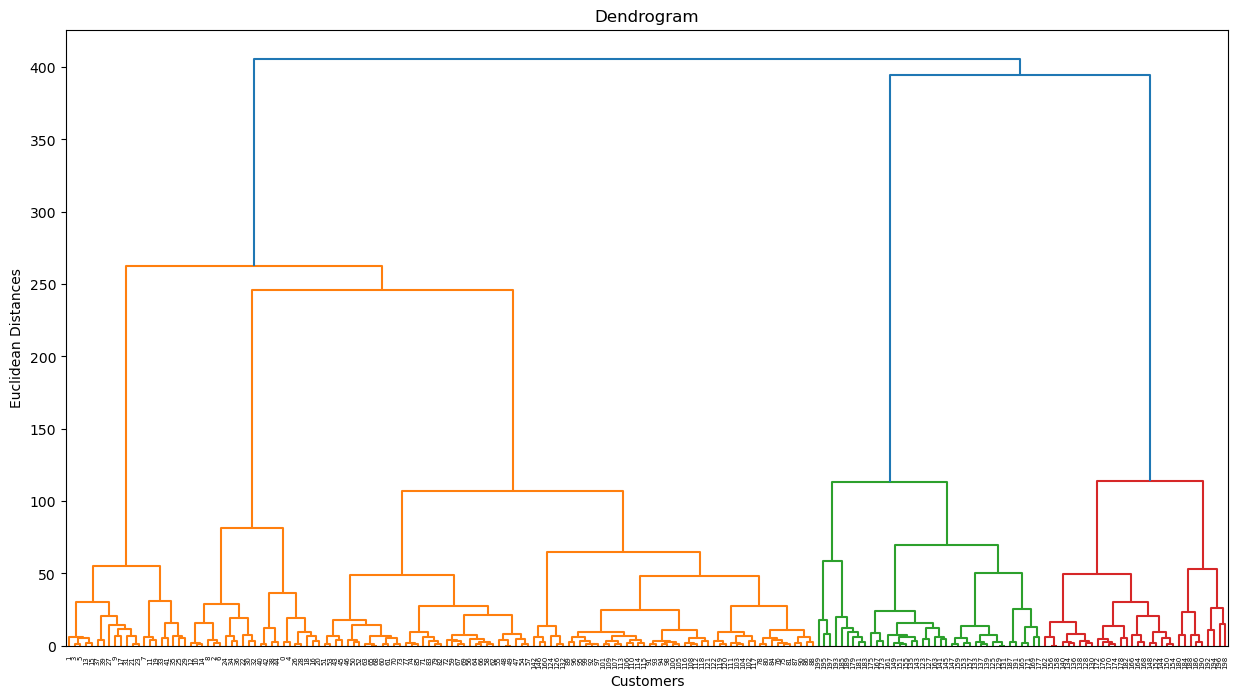

In [8]:
# Select the features for clustering
X = df[['Annual_Income', 'Spending_Score']].values

# Create the dendrogram
plt.figure(figsize=(15, 8))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

we can see that the longest vertical line in the diagram suggests that cutting the tree to form 5 clusters is the optimal choice.

#### Building the Hierarchical Clustering Model

In [14]:
# Build the Agglomerative Clustering model with n_clusters=5
# hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
hc = AgglomerativeClustering(n_clusters=5, linkage='ward')

# Fit the model and predict the cluster for each data point
y_hc = hc.fit_predict(X)

# Add the cluster labels to the original DataFrame
df['Cluster'] = y_hc

print("Hierarchical clustering model built and clusters assigned.")
df.head()

Hierarchical clustering model built and clusters assigned.


,CustomerID,Gender,Age,Annual_Income,Spending_Score,Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


#### Visualizing the Clusters

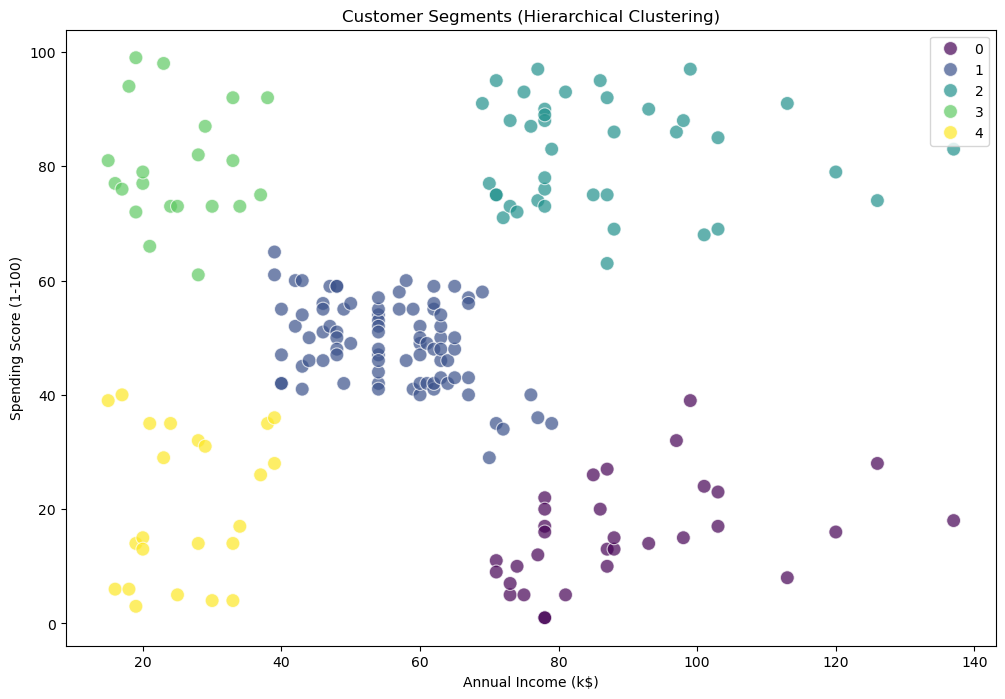

In [16]:
# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='Cluster', data=df, palette='viridis', s=100, alpha=0.7)

plt.title('Customer Segments (Hierarchical Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()